In [1]:
!pip install pandas

import pandas as pd

# Load the data from the provided CSV file
file_path = 'data/participants.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 3.0 MB/s eta 0:00:00
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.4-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 6.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 8.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 7.1 MB/s eta 0:00:0000:01:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 4.6 MB/s eta 0:00:0000:0100:01


,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [2]:
# Analyzing the distribution of 'ss1' and 'ss2' columns where their values are 4

# Counting occurrences of 'ss1' and 'ss2' being 4
ss1_count = (data['ss1'] == 4).sum()
ss2_count = (data['ss2'] == 4).sum()

# Total number of entries
total_entries = len(data)

# Calculating the distribution (percentage) of ss1 and ss2 being 4
ss1_distribution = (ss1_count / total_entries) * 100
ss2_distribution = (ss2_count / total_entries) * 100

ss1_distribution, ss2_distribution

(54.57356692758869, 42.617850990994924)

In [3]:
# Load the additional CSV files for merging
file_path_stats1 = 'data/stats1.csv'
file_path_stats2 = 'data/stats2.csv'

stats1 = pd.read_csv(file_path_stats1)
stats2 = pd.read_csv(file_path_stats2)

# Display the first few rows of each dataset to understand their structure
stats1.head(), stats2.head()

/tmp/ipykernel_28967/1730649053.py:6: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  stats2 = pd.read_csv(file_path_stats2)


(   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
 0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
 1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
 2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
 3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
 4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   
 
    neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
 0                    69              42                27             610   
 1                     1               1                 0             211   
 2                     3               1                 2             182   
 3                     6               6                 0             106   
 4                     4               3                 1             159   
 
    champlvl  pinksbought  wardsbought  wardsplaced  wardski

In [4]:
# Since both files have the same columns, we can simply concatenate them
merged_data = pd.concat([stats1, stats2], ignore_index=True)

# Display the first few rows of the merged dataset to verify the concatenation
merged_data.head(), merged_data.tail()


(   id  win  item1  item2  item3  item4  item5  item6  trinket  kills  ...  \
 0   9    0   3748   2003   3111   3053   1419   1042     3340      6  ...   
 1  10    0   2301   3111   3190   3107      0      0     3364      0  ...   
 2  11    0   1055   3072   3006   3031   3046   1036     3340      7  ...   
 3  12    0   1029   3078   3156   1001   3053      0     3340      5  ...   
 4  13    0   3020   1058   3198   3102   1052   1026     3340      2  ...   
 
    neutralminionskilled  ownjunglekills  enemyjunglekills  totcctimedealt  \
 0                    69              42                27             610   
 1                     1               1                 0             211   
 2                     3               1                 2             182   
 3                     6               6                 0             106   
 4                     4               3                 1             159   
 
    champlvl  pinksbought  wardsbought  wardsplaced  wardski

In [5]:
# Filtering players with ss1 equal to 4 and ss2 equal to 4
ss1_players = data[data['ss1'] == 4]
ss2_players = data[data['ss2'] == 4]

# Merging the filtered data with the stats to get the win/loss record
ss1_stats = pd.merge(ss1_players, merged_data[['id', 'win']], on='id')
ss2_stats = pd.merge(ss2_players, merged_data[['id', 'win']], on='id')

# Calculating win rates
ss1_win_rate = ss1_stats['win'].mean()
ss2_win_rate = ss2_stats['win'].mean()

ss1_win_rate, ss2_win_rate


(0.5003111387678905, 0.4996725639267771)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 3.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 6.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.9/303.9 kB 3.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 7.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 7.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.9 MB/s eta 0:00:00


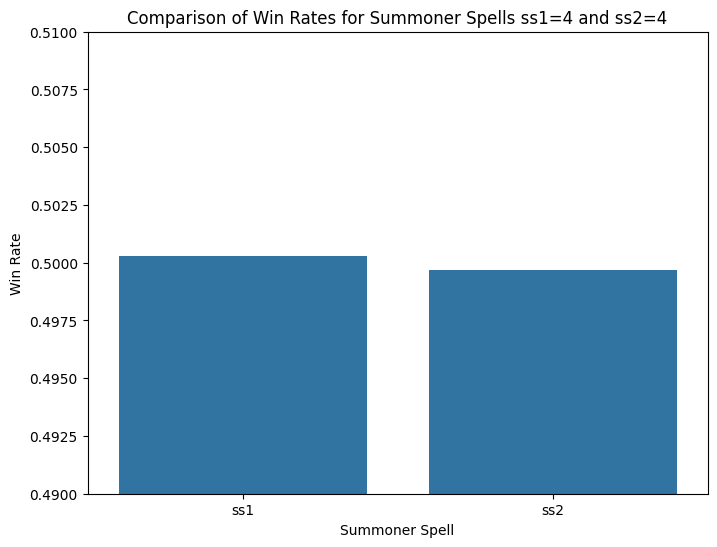

In [7]:
!pip install seaborn matplotlib

import seaborn as sns
import matplotlib.pyplot as plt

# Preparing data for visualization
win_rates = pd.DataFrame({
    "Summoner Spell": ["ss1", "ss2"],
    "Win Rate": [ss1_win_rate, ss2_win_rate]
})

# Plotting the win rates using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x="Summoner Spell", y="Win Rate", data=win_rates)
plt.title("Comparison of Win Rates for Summoner Spells ss1=4 and ss2=4")
plt.ylabel("Win Rate")
plt.ylim(0.49, 0.51)  # Setting limits to better visualize the small differences
plt.show()